# Tarea de Modelos Estocásticos (Teoría de Decisiones)

- **Alumno:** Eduardo Carrasco Vidal
- **Profesor:** Relly Pellicer
- **Curso:** Teoría de Decisiones y Complejidad en Ciencias Sociales

## 1. Parámetros del Modelo de Precios de una Acción

Considere los siguientes parámetros para el modelo de precios de una acción:

- **Tendencia del precio**: \( \alpha = -0.025 \)
- **Volatilidad del precio**: \( \sigma = 0.2 \)
- **Intervalo de tiempo de la simulación**: \( T = 10000 \)
- **Valor inicial del precio de la acción**: \( S(0) = 800 \)

## 2. Procesos Binomiales:

### 2.A. Proceso Binomial Simétrico:

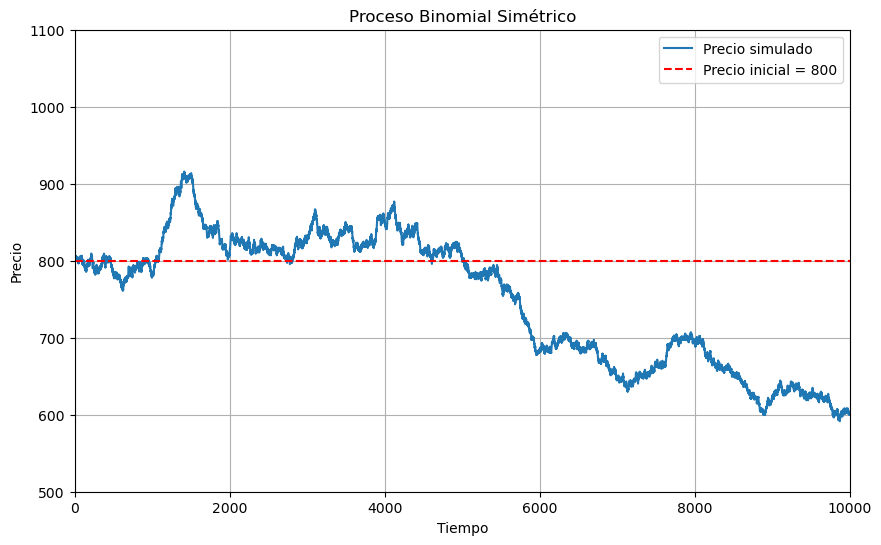

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

random.seed(120)

# Funciones:
def generate_increment_or_decrement(u, d, p):
    return (u, d)[random.random() <= p]

def simulate_symmetric_binomial_process(T, S0, sigma, u, d, p):
    M = 0  # Contador para el número de subidas y bajadas
    S = [S0]  # Lista para almacenar los precios de las acciones
    x = [0]  # Lista para almacenar el tiempo normalizado

    for i in range(1, T):
        M += generate_increment_or_decrement(u, d, p)
        Unt = 0.5 * (i + M)
        Dnt = 0.5 * (i - M)
        un = 1 + sigma / np.sqrt(T)
        dn = 1 - sigma / np.sqrt(T)
        
        Sn = S0 * (un ** Unt) * (dn ** Dnt)
        
        S.append(Sn)
        x.append(i / T)
        
    return S, x

# Parámetros:
T = 10000  # Intervalo de tiempo de la simulación
S0 = 800  # Valor inicial del precio de la acción
sigma = 0.2  # Volatilidad del precio
u = 1  # Incremento
d = -1  # Decremento
p = 0.5  # Probabilidad de un incremento

S_out, x_out = simulate_symmetric_binomial_process(T, S0, sigma, u, d, p)

# Grafico:
plt.figure(figsize=(10, 6))
plt.plot(S_out, label="Precio simulado")
plt.ylabel('Precio')
plt.xlabel('Tiempo')
plt.title('Proceso Binomial Simétrico')
plt.axhline(y=S0, color='red', linestyle='--', label=f"Precio inicial = {S0}")
plt.xlim([0, T])
plt.ylim([500, 1100])
plt.legend()
plt.grid(True)
plt.show()

### 2.B. Proceso Binomial con Tendencia (alpha):

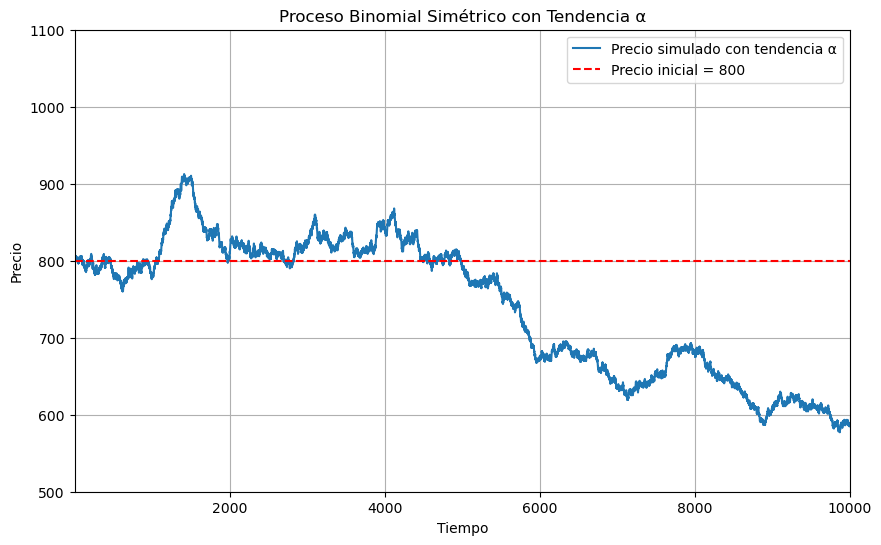

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt

random.seed(120)

# Funciones:
def generate_increment_or_decrement(u, d, p):
    return (u, d)[random.random() <= p]

def simulate_symmetric_binomial_process_with_trend(T, S0, sigma, alpha, u, d, p):
    M = 0
    S = [S0]
    x = [0]

    for i in range(1, T):
        M += generate_increment_or_decrement(u, d, p)
        Unt = 0.5 * (i + M)
        Dnt = 0.5 * (i - M)
        un = 1 + sigma / np.sqrt(T)
        dn = 1 - sigma / np.sqrt(T)
        
        Sn = S0 * (un ** Unt) * (dn ** Dnt) * np.exp(alpha * (i / T))  
        
        S.append(Sn)
        x.append(i / T)
        
    return S, x

# Parámetros:
T = 10000  # Intervalo de tiempo de la simulación
S0 = 800  # Valor inicial del precio de la acción
sigma = 0.2  # Volatilidad del precio
alpha = -0.025  # Tendencia del precio
u = 1  # Incremento
d = -1  # Decremento
p = 0.5  # Probabilidad de un incremento

S_out, x_out = simulate_symmetric_binomial_process_with_trend(T, S0, sigma, alpha, u, d, p)

# Grafico:
plt.figure(figsize=(10, 6))
plt.plot(S_out, label="Precio simulado con tendencia α")
plt.ylabel('Precio')
plt.xlabel('Tiempo')
plt.title('Proceso Binomial Simétrico con Tendencia α')
plt.axhline(y=S0, color='red', linestyle='--', label=f"Precio inicial = {S0}")
plt.xlim([2, T])
plt.ylim([500, 1100])
plt.legend()
plt.grid(True)
plt.show()

## 3. Proceso Browniano Geométrico:

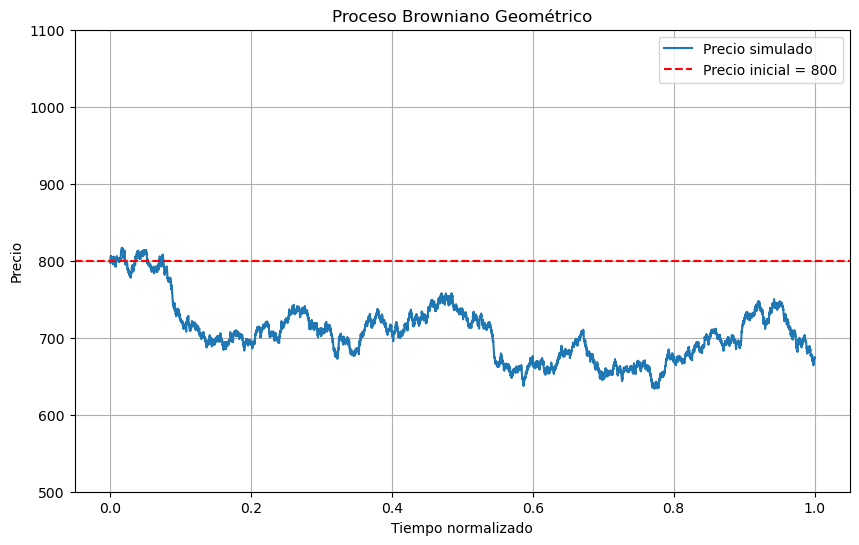

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(121)

# Funciones:
def simulate_geometric_brownian_motion(N, s0, alpha, sigma):
    dt = 1 / (N - 1)  # Paso de tiempo
    t = np.linspace(0, 1, N)  # Tiempo normalizado
    dW = np.sqrt(dt) * np.random.normal(0, 1, N - 1)  # Movimiento Browniano
    
    W = np.cumsum(dW)  # Trayectoria del movimiento browniano
    W = np.insert(W, 0, 0)  # Inicializar W(0) = 0
    
    S = s0 * np.exp(sigma * W + (alpha - 0.5 * sigma ** 2) * t)
    
    return t, S

# Parámetros:
N = 10000  # Número de pasos de tiempo
s0 = 800  # Precio inicial
alpha = -0.025  # Tendencia (alfa)
sigma = 0.2  # Volatilidad (sigma)

t, S = simulate_geometric_brownian_motion(N, s0, alpha, sigma)

# Gráfico:
plt.figure(figsize=(10, 6))
plt.plot(t, S, label="Precio simulado")
plt.axhline(y=s0, color='red', linestyle='--', label=f"Precio inicial = {s0}")
plt.ylabel('Precio')
plt.ylim([500, 1100])
plt.xlabel('Tiempo normalizado')
plt.title('Proceso Browniano Geométrico')
plt.legend()
plt.grid(True)
plt.show()

## 4. Explique por qué, a pesar de lo diferente que se ven gráficamente las trayectorias de los procesos simulados en 2 y 3, se entiende que ambos simulan correctamente el precio de la acci ón en cuestión.

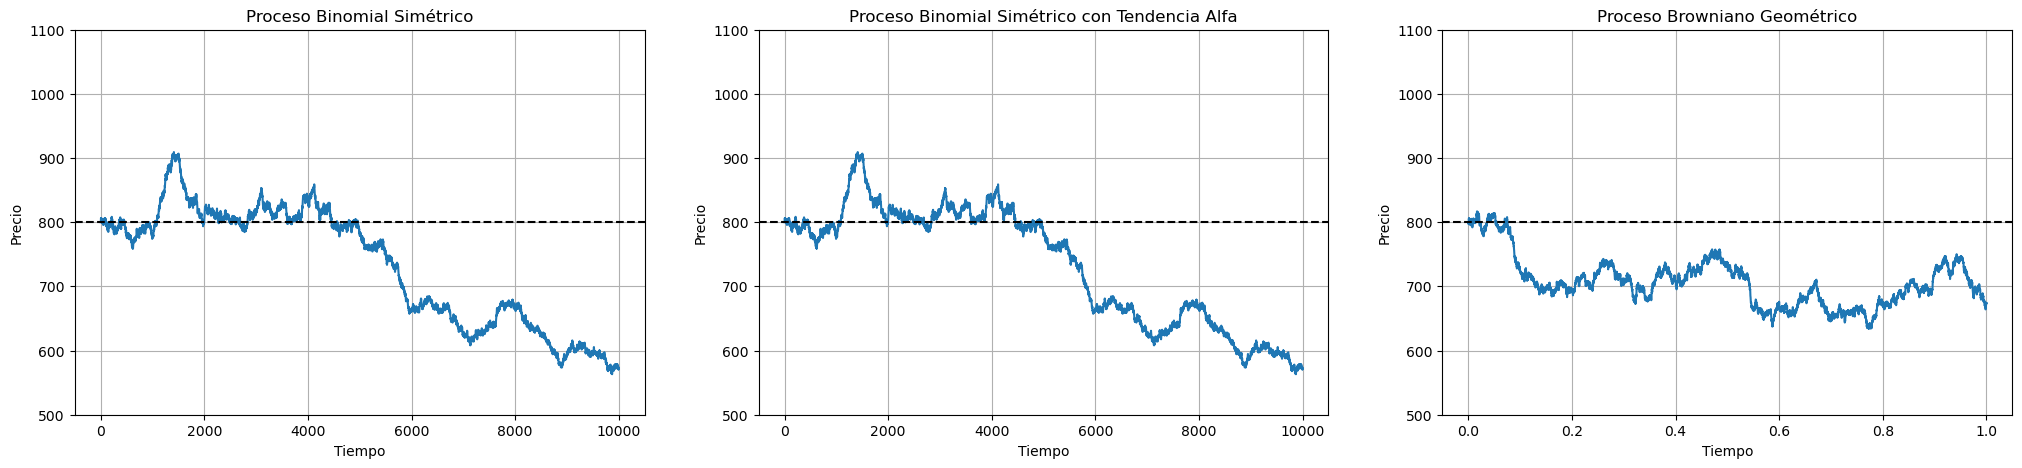

In [11]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
plt.plot(S_out, label="Precio simulado")
plt.axhline(y=s0, color='black', linestyle='--', label=f"Precio inicial = {s0}")
plt.ylabel('Precio')
plt.ylim([500, 1100])
plt.xlabel('Tiempo')
plt.title('Proceso Binomial Simétrico')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(S_out, label="Precio simulado con tendencia α")
plt.axhline(y=s0, color='black', linestyle='--', label=f"Precio inicial = {s0}")
plt.ylabel('Precio')
plt.ylim([500, 1100])
plt.xlabel('Tiempo')
plt.title('Proceso Binomial Simétrico con Tendencia Alfa')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(t, S, label="Precio simulado")
plt.axhline(y=s0, color='black', linestyle='--', label=f"Precio inicial = {s0}")
plt.ylabel('Precio')
plt.ylim([500, 1100])
plt.xlabel('Tiempo')
plt.title('Proceso Browniano Geométrico')
plt.grid()

plt.show()

Aunque las trayectorias de los procesos en 2 y 3 se vean diferentes en los gráficos, ambos modelos son válidos para simular el precio de una acción porque capturan las mismas características fundamentales: la tendencia y la volatilidad del precio, convergiendo hacia el mismo comportamiento a largo plazo. Como en el caso del Modelo Binomial, cuando aumentas el número de pasos hasta infinito, este se acerca al Proceso Browniano Geométrico.

En cuanto al parámetro alfa ('α'), que representa la tendencia del precio, el efecto en los modelos es imperceptible con un valor de -0.025. Sin embargo, es una componente importante para modelar expectativas de crecimiento o declive a largo plazo, aunque en la escala de la simulación no altere drásticamente la trayectoria del precio.

En resumen, ambos modelos ofrecen herramientas robustas para el análisis de precios de activos.

## 5. Referencias:

- Gianin, E. R., Sgarra, C., Gianin, E. R., & Sgarra, C. (2013). Short review of Probability and of Stochastic Processes. Mathematical Finance: Theory Review and Exercises: From Binomial Model to Risk Measures, 1-15.
- Nwafor, C. N., & Oyedele, A. A. (2017). Simulation and hedging oil price with geometric Brownian Motion and single-step binomial price model. European Journal of Business and Management, 9(9), 68-81.